In [12]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

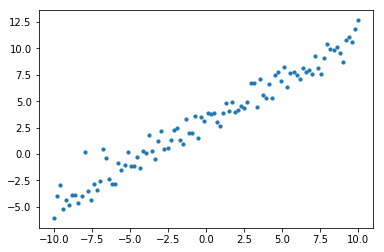

In [13]:
# Sample 100 points near a line
N = 100
M, C = .78, 3.07
X = np.linspace(-10, 10, N)
Y = (M*X + C) + np.random.randn(N)
plt.scatter(X, Y, 10)

In [14]:
# Initialize m and c
m = 0
c = 0
i = 0

In [15]:
while i<1000:
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2    
    loss = np.sum(costs)/N
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    m-=.001*dm
    c-=.001*dc
    if i%100==0:
        print('Loss = %f' %loss)
    i+=1


Loss = 31.583057
Loss = 7.327148
Loss = 5.186470
Loss = 3.752116
Loss = 2.791025
Loss = 2.147044
Loss = 1.715544
Loss = 1.426417
Loss = 1.232686
Loss = 1.102877


Original parameters: {m:0.780000, c: 3.070000}
Predicted parameters: {m:0.786971, c: 2.691415}


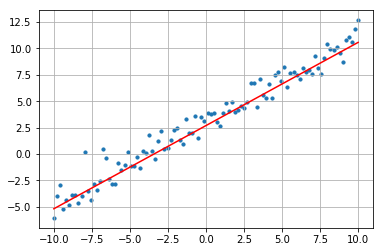

In [16]:
plt.grid()
plt.scatter(X, Y, 10)
plt.plot(X, m*X+c, 'r')
print("Original parameters: {m:%f, c: %f}" %(M, C))
print("Predicted parameters: {m:%f, c: %f}" %(m, c))


## Let us make our code modular

This is the thinking:

Initialize $\theta$<br>
i = 0 <br>
while i < 1000:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$Y_{hat}, loss = forwardProp(\theta, X, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\partial \theta = backProp(X, Y_{hat}, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\theta = update(\theta, \partial \theta)$<br>


In [17]:
import numpy as np
def sample(N = 100):
    M, C = .78, 3.07
    X = np.linspace(-10, 10, N)
    Y = (M*X + C) + np.random.randn(N)
    return X, Y, M, C

In [18]:
def forward_prop(theta, X, Y):
    N = X.shape[0]
    m, c = theta['m'], theta['c']
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2
    loss = np.sum(costs)/N
    return Y_hat, loss
    

In [19]:
def back_prop(X, Y_hat, Y):
    N = X.shape[0]
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    dtheta = {'dm': dm, 'dc': dc}
    return dtheta
    

In [20]:
def update(theta, dtheta, learning_rate=.001):
    theta['m']-=learning_rate*dtheta['dm']
    theta['c']-=learning_rate*dtheta['dc']
    return theta

In [21]:
X, Y, m_orig, c_orig = sample()
theta = {'m': 0, 'c': 0}
i = 0
while i<1000:
    Y_hat, loss = forward_prop(theta, X, Y)
    dtheta = back_prop(X, Y_hat, Y)
    theta = update(theta, dtheta)
    if i%100==0:
        print('Loss=%f at %ith iteration' %(loss, i))
    i+=1

Loss=30.405335 at 0th iteration
Loss=7.557010 at 100th iteration
Loss=5.387847 at 200th iteration
Loss=3.934405 at 300th iteration
Loss=2.960524 at 400th iteration
Loss=2.307974 at 500th iteration
Loss=1.870731 at 600th iteration
Loss=1.577756 at 700th iteration
Loss=1.381448 at 800th iteration
Loss=1.249911 at 900th iteration
